In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

#這一行表示不希望看到警告訊息
warnings.filterwarnings(action='ignore')

In [14]:
data=pd.read_csv("bodyPerformance.csv")

In [15]:
print("資料筆數:",len(data))
print("欄位數量",len(data.columns))

資料筆數: 13393
欄位數量 12


In [16]:
#查詢資料表訊息:可以得知該資料表的整理資訊，包含 not-null、資料維度、格式和所佔空間等等
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [17]:
#查看前幾筆資料，括號內未有數字預設為5
data.head(3)
#查看後幾筆資料，括號內未有數字預設為5
data.tail()
#查看所有資料，但數據太多中間會以...表示
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [18]:
#檢視所有欄位的敘述型統計

data.describe(include='all')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,8467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3349
mean,36.775106,NaN,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627,NaN
std,13.625639,NaN,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000,NaN
min,21.000000,NaN,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,NaN
25%,25.000000,NaN,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,NaN
50%,32.000000,NaN,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,NaN
75%,48.000000,NaN,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,NaN


In [19]:
#.sort_values("欄位名稱"):此欄位做排序，.sort_values("欄位名稱",ascending= False):反序
data.sort_values("class").head(100)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
2363,21.0,F,162.7,57.2,26.8,72.0,104.0,26.6,34.4,43.0,188.0,A
11438,24.0,F,157.7,46.0,25.4,70.0,120.0,26.2,21.5,45.0,173.0,A
11437,23.0,F,164.6,57.0,20.2,68.0,100.0,34.1,22.3,48.0,182.0,A
6065,21.0,F,157.8,57.9,25.9,61.0,92.0,26.6,25.1,54.0,190.0,A
2845,31.0,F,159.3,52.9,15.4,87.0,127.0,31.3,20.1,48.0,190.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
2891,24.0,M,184.7,38.6,9.0,81.0,137.0,55.0,19.6,56.0,242.0,A
6034,24.0,M,178.0,79.0,19.3,80.0,132.0,50.2,16.3,58.0,221.0,A
2893,36.0,M,178.2,82.4,25.7,91.0,157.0,46.6,19.9,47.0,240.0,A
2896,23.0,M,167.1,66.9,21.2,77.0,142.0,40.5,18.3,65.0,234.0,A


In [20]:
#選擇一項資料，若只要選擇某幾筆資料則：data['age'][0:4]，0~3的資料
data['age']

0        27.0
1        25.0
2        31.0
3        32.0
4        28.0
         ... 
13388    25.0
13389    21.0
13390    39.0
13391    64.0
13392    34.0
Name: age, Length: 13393, dtype: float64

In [21]:
#選擇多項資料
data[['age','class']]

,age,class
0,27.0,C
1,25.0,A
2,31.0,C
3,32.0,B
4,28.0,B
...,...,...
13388,25.0,C
13389,21.0,D
13390,39.0,A
13391,64.0,D


In [22]:
for i in enumerate(data.columns):
    print('順序:{}, 每個欄位的獨立值 in "{}":\n'.format(i[0]+1,i[1]),data[i[1]].unique())

順序:1, 每個欄位的獨立值 in "age":
 [27. 25. 31. 32. 28. 36. 42. 33. 54. 57. 22. 24. 45. 26. 21. 59. 38. 44.
 23. 62. 47. 48. 50. 30. 49. 40. 52. 39. 34. 58. 43. 56. 37. 63. 35. 60.
 51. 41. 46. 29. 61. 55. 64. 53.]
順序:2, 每個欄位的獨立值 in "gender":
 ['M' 'F']
順序:3, 每個欄位的獨立值 in "height_cm":
 [172.3 165.  179.6 174.5 173.8 165.4 164.5 174.9 166.8 185.  169.2 153.
 156.  175.7 181.  159.  164.2 179.9 162.7 161.7 155.9 166.7 170.  164.1
 169.  158.3 175.8 176.  159.8 170.9 176.7 159.5 172.1 151.5 177.6 172.5
 177.5 178.  168.  173.6 173.3 159.6 161.8 169.9 183.6 180.1 169.8 157.2
 168.3 164.4 146.5 174.1 185.4 168.9 175.3 164.  162.4 166.6 174.2 150.5
 160.2 179.  172.7 171.5 175.1 172.2 171.9 174.  158.1 170.4 158.6 168.5
 156.3 157.  161.3 177.  171.  178.4 156.7 178.5 171.2 176.4 175.4 158.4
 173.  159.1 180.5 162.2 168.8 170.3 172.8 163.6 166.2 179.2 177.8 184.7
 173.2 164.3 169.1 183.5 156.9 178.2 177.9 184.8 164.7 178.3 160.1 167.7
 165.1 160.3 153.2 169.5 180.2 180.3 167.9 165.6 184.1 166.9 175.  

In [23]:
numeric=[]

for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)

In [24]:
#接下來處理類別欄位，且排除掉我們的數值型欄位

categoricals=[]

for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('class')

In [25]:
#看看類別欄位

categoricals

['gender']

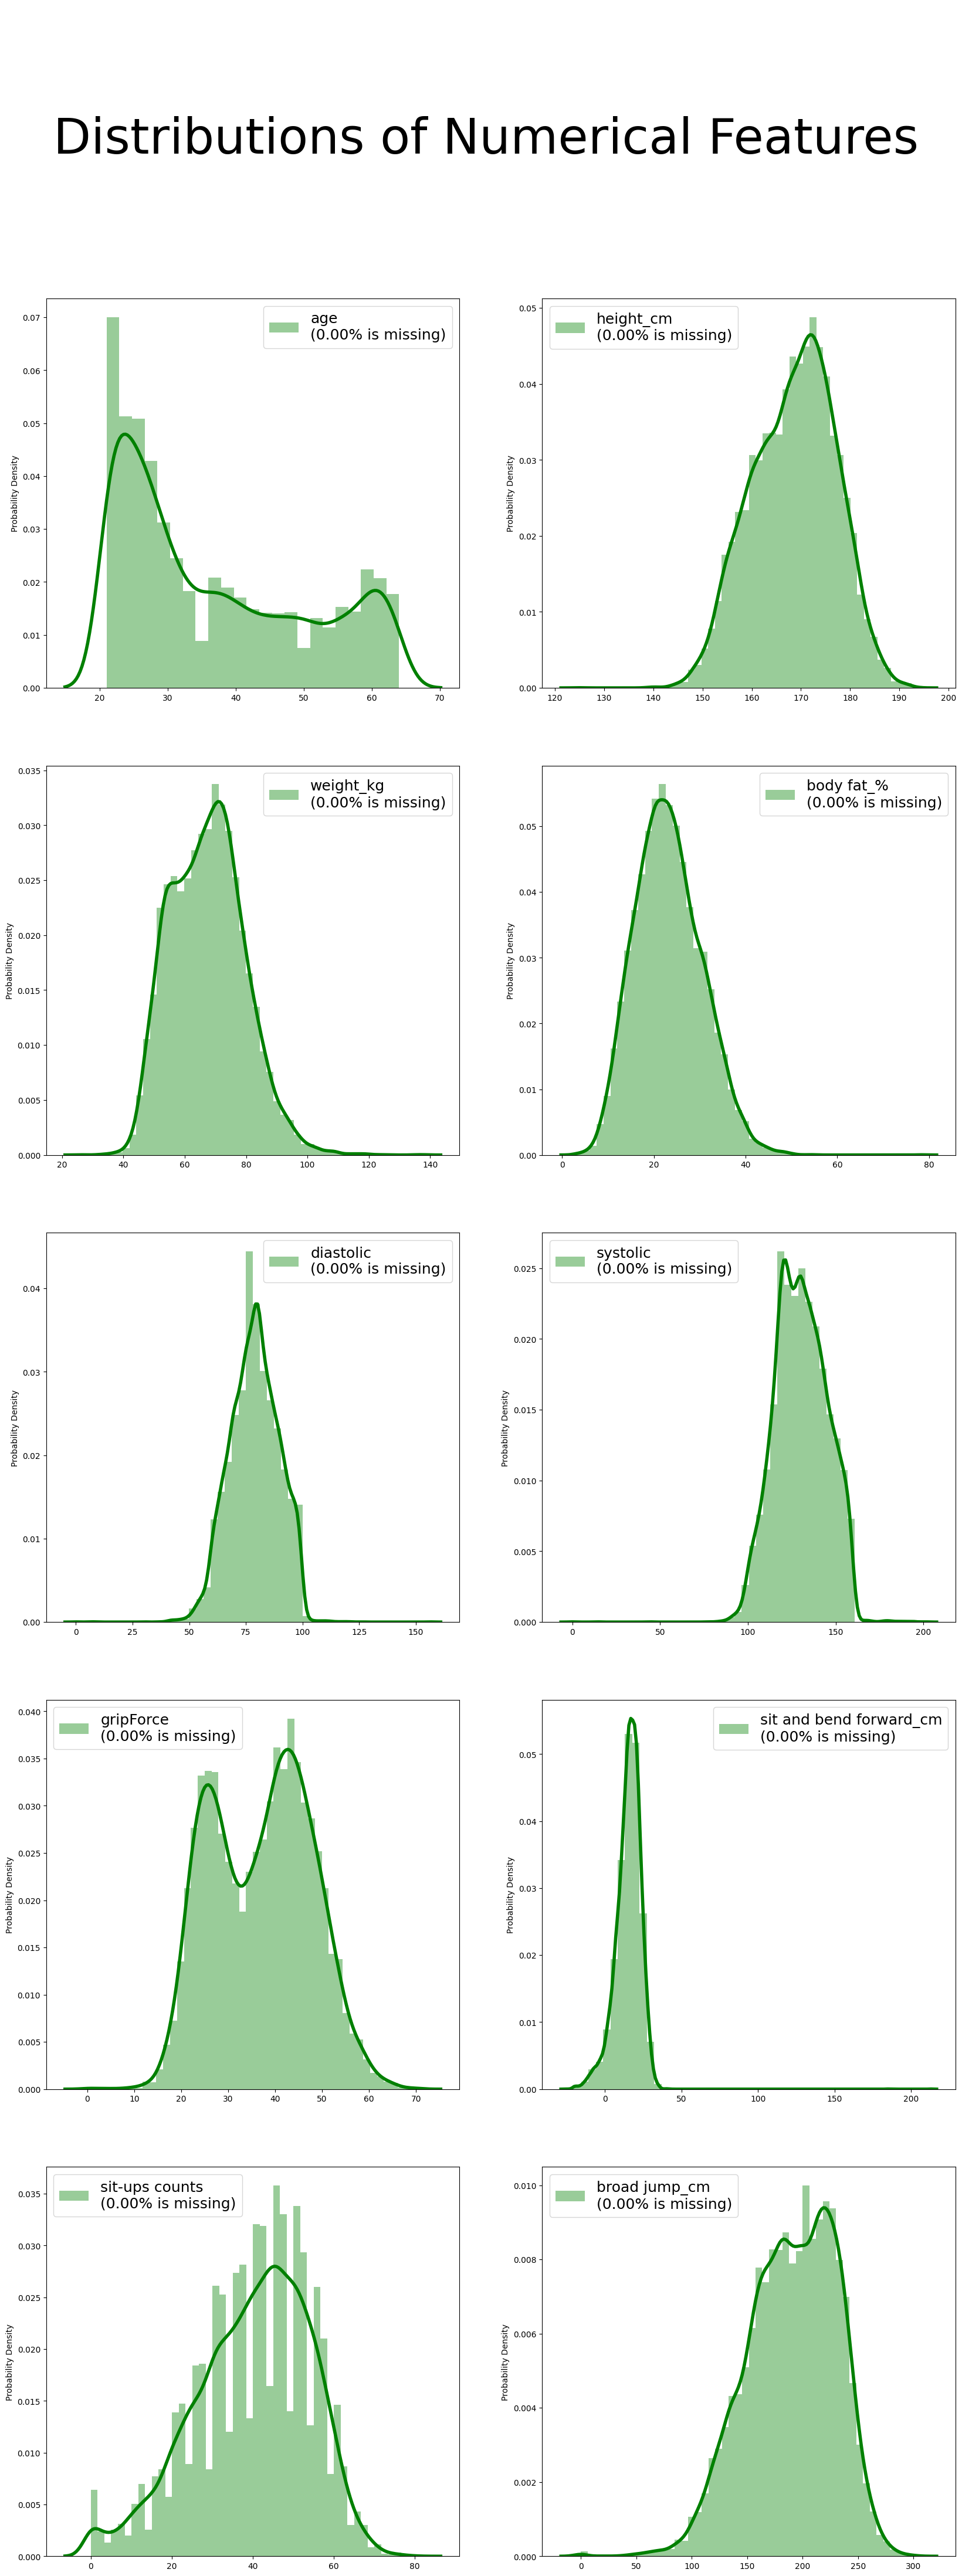

In [26]:
#一覽表視覺化，繪製 (5x2) 的圖表
#數值型欄位

#7x2的圖表
n_rows, n_cols = (5,2)

#每一張圖表大小為20x50
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))

#給予這張一覽表名稱
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

#走訪每一個數值型欄位
#陣列變為 index, column走訪方式，要透過enumerate
for index, column in enumerate(numeric):
    
    #index由0開始
    #例如: 5//2為2(商數)，5%2為1(餘數)
    i,j = (index // n_cols), (index % n_cols)
    
    #計算該欄位去除空值的數量除以該欄位總數量的百分比
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    #文字敘述該欄位遺缺值的百分比
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    #透過seaborn的distplot針對該欄位畫圖
    #需增加常態分佈的線條
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
    
    #指派圖形位置，KDE線條寬度為4
    ax=axes[i,j], kde_kws={"lw":4})
    
    #在圖片中顯示文字說明
    #顯示的位置由程式自行判斷 (loc為best)
    fig=fig.legend(loc='best', fontsize=18)
    
    #定義每張圖的y軸說明文字
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    #定義每張圖x軸說明文字為無
    axes[i,j].set_xlabel(None)

plt.show()

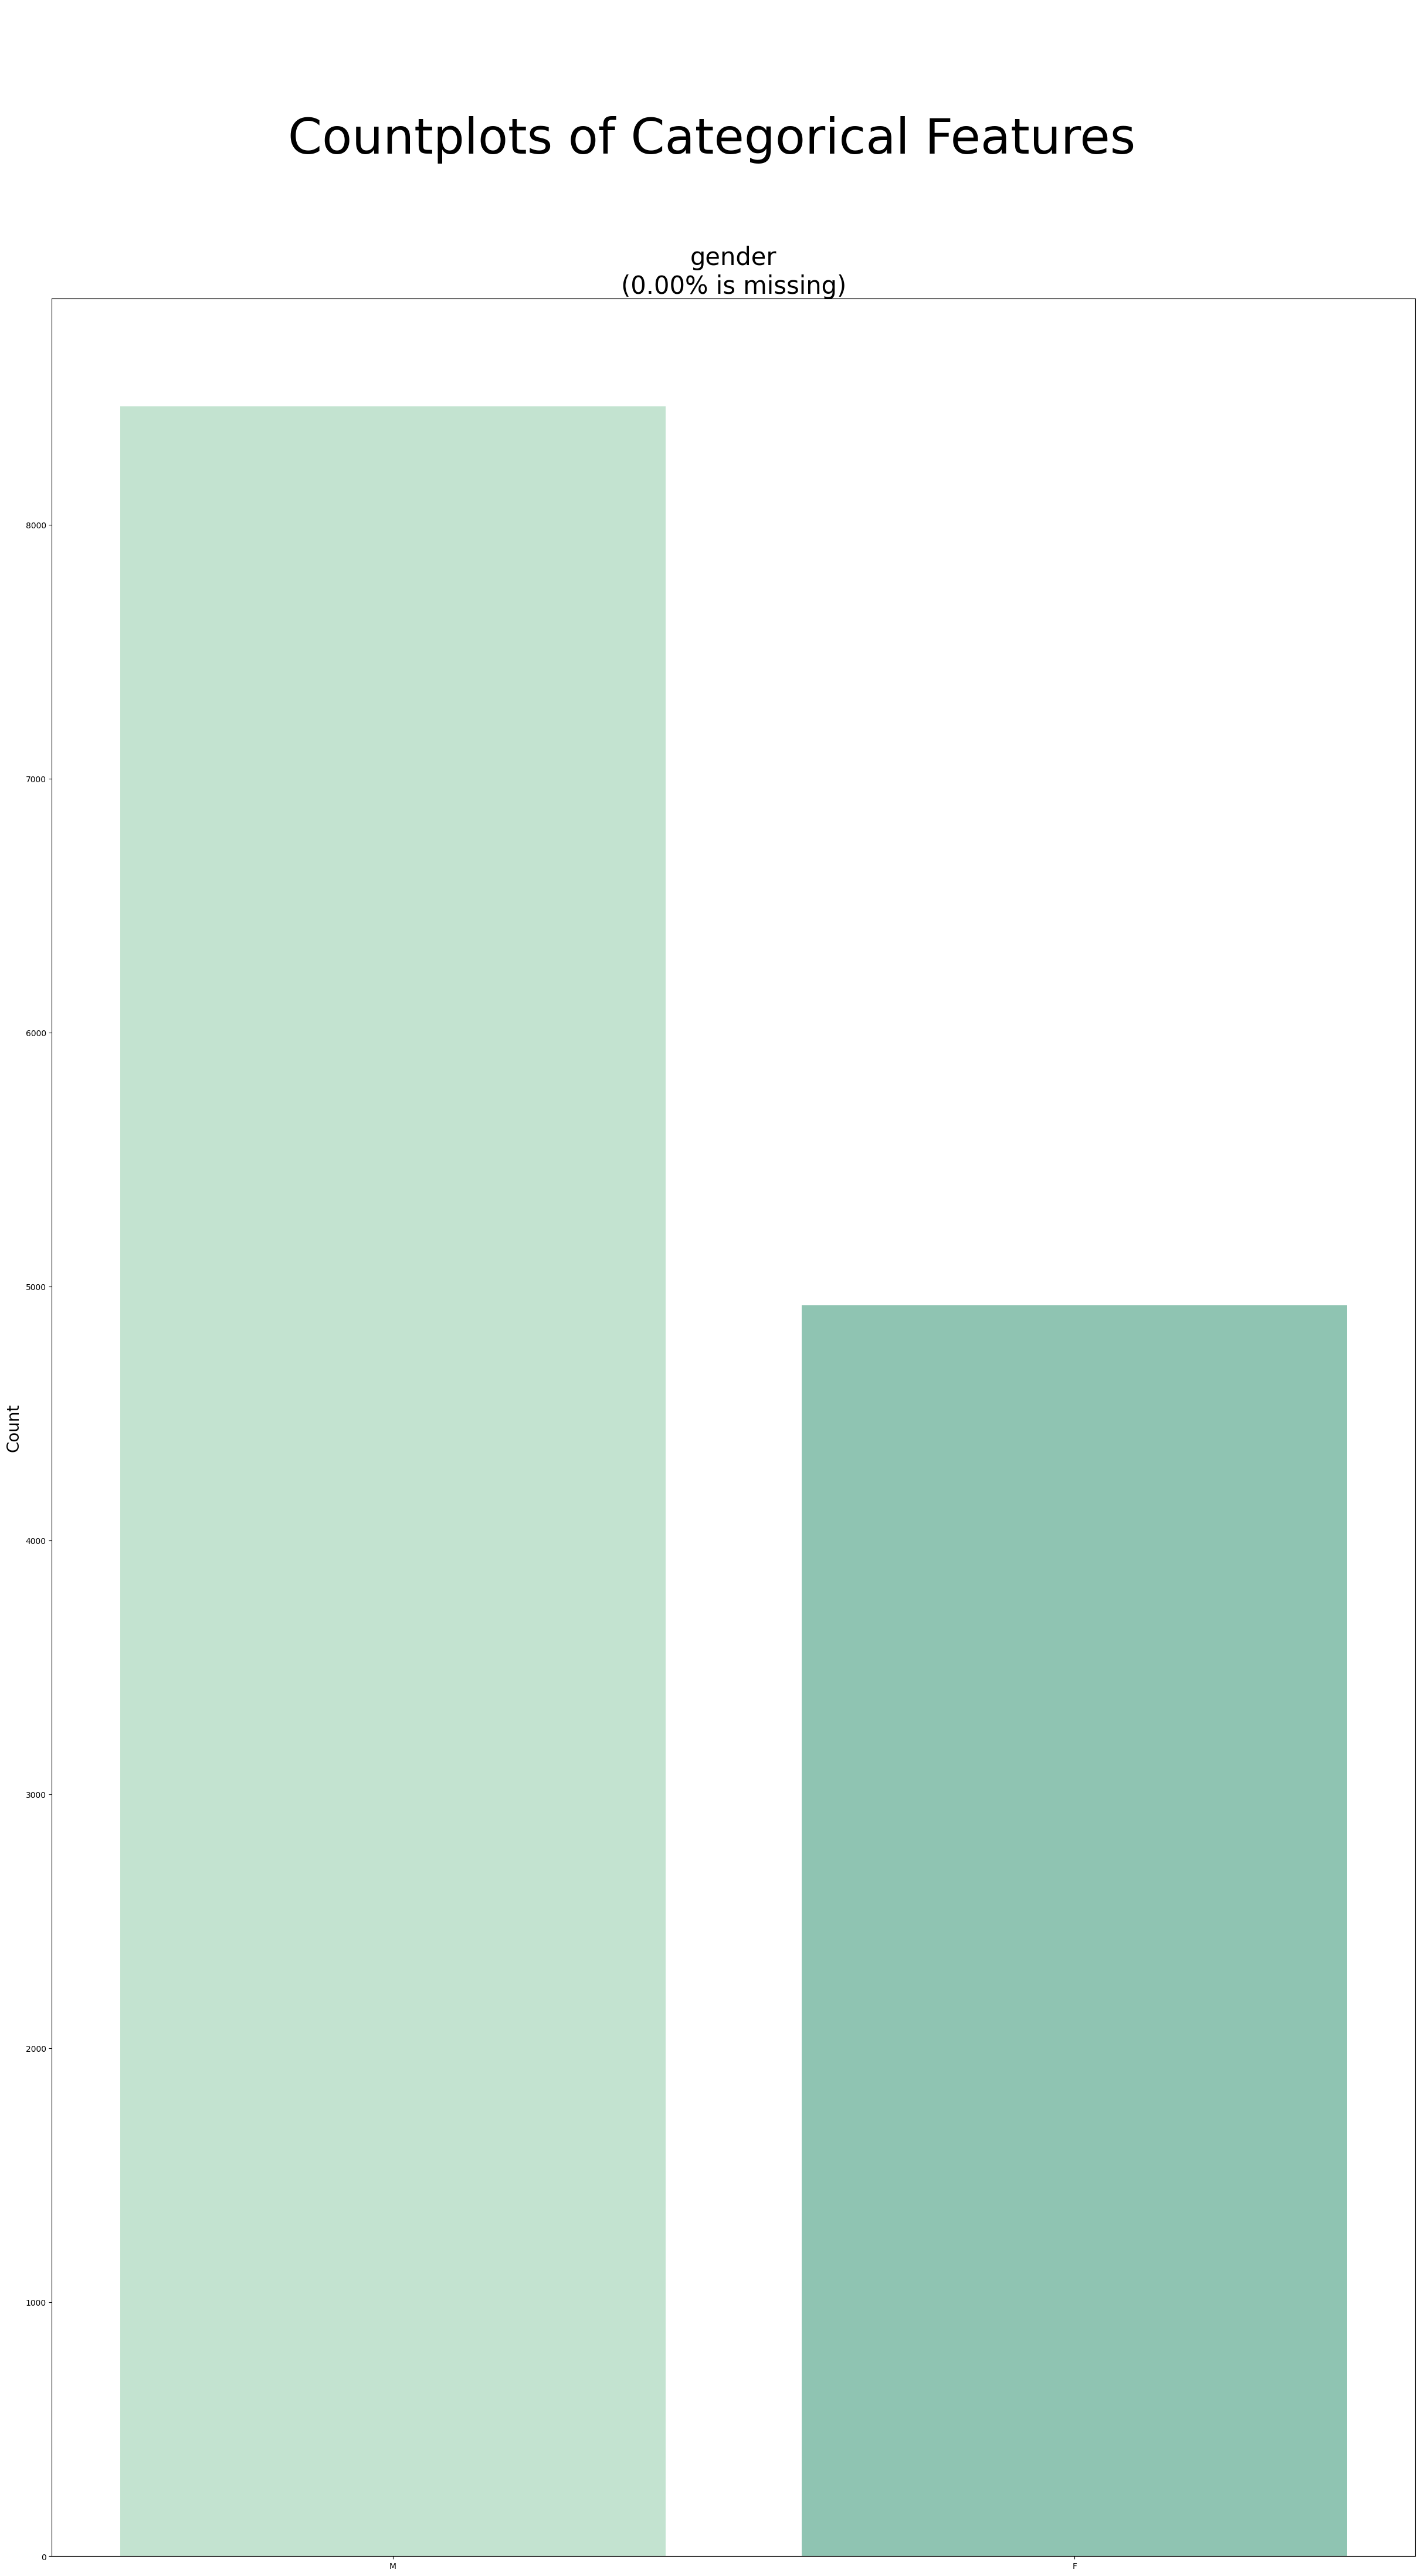

In [27]:
#類別型欄位

n_rows, n_cols = (1,1)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    #i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes)
    
    fig .set_title(collabel,fontsize=30)
    
    fig .set_xlabel(None)
    
    fig .set_ylabel("Count",fontsize=20)
    
    #fig .set_xticklabels(axes[i,j].get_xticklabels(), fontsize='medium')

plt.show()

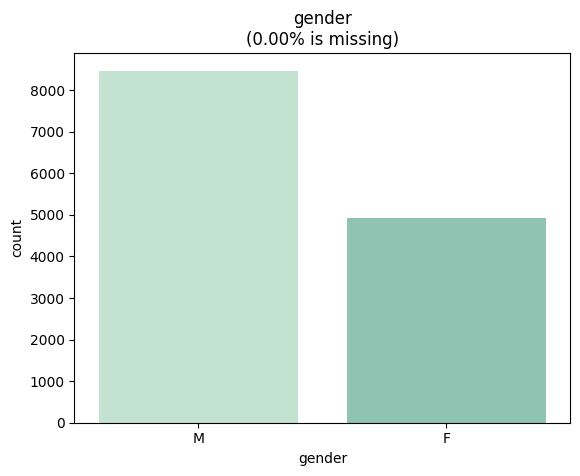

In [28]:
#應變數

miss_perc="%.2f"%(100*(1-(data['gender'].dropna().shape[0])/data.shape[0]))
    
label="gender\n(missing:\n{}%)".format(miss_perc)

fig=sns.countplot(x=data['gender'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("gender\n({}% is missing)".format(miss_perc))
plt.show()

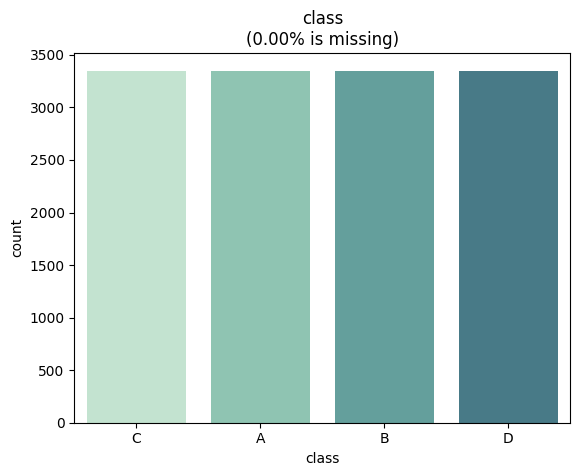

In [29]:
#應變數

miss_perc="%.2f"%(100*(1-(data['class'].dropna().shape[0])/data.shape[0]))
    
label="class\n(missing:\n{}%)".format(miss_perc)

fig=sns.countplot(x=data['class'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("class\n({}% is missing)".format(miss_perc))
plt.show()

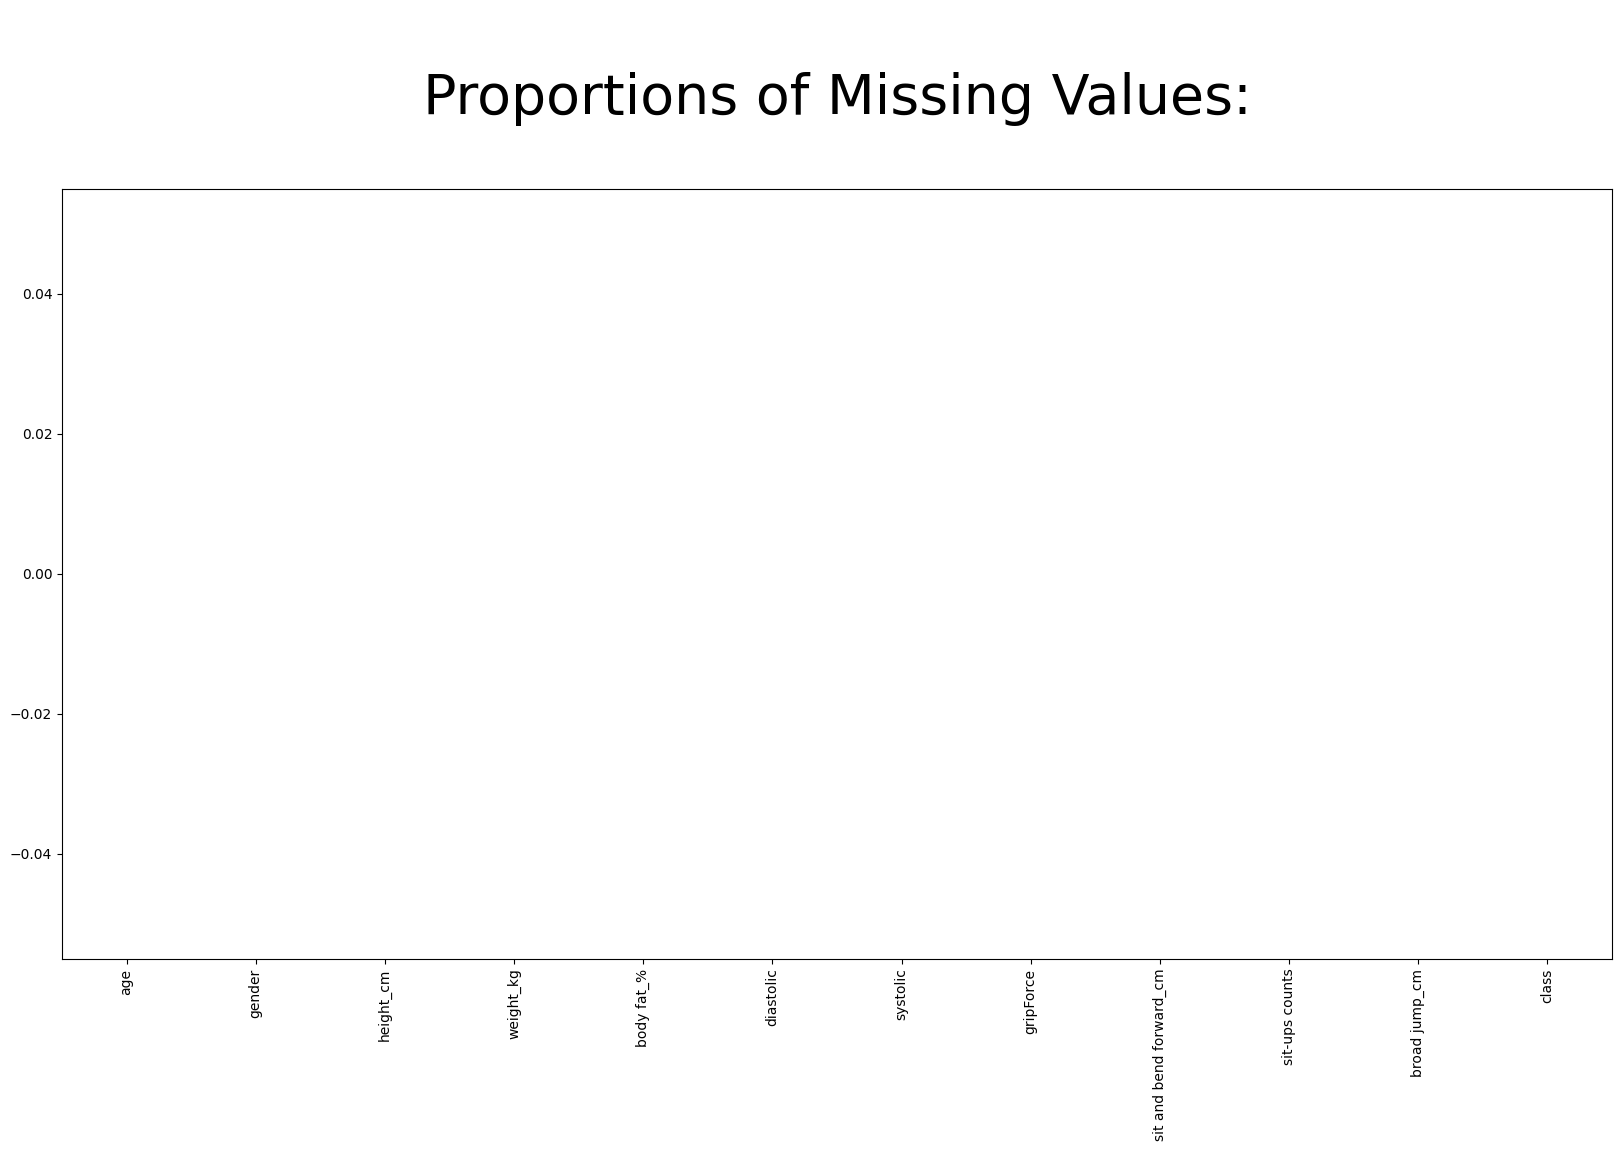

In [30]:
#展示遺缺值的比率
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
#畫一張圖，大小為20x10
d.plot(kind='bar', figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [31]:
#進行 dummy-variable (僅針對類別型欄位)
#欄位名稱會改變
dummydata=pd.get_dummies(data,drop_first=False,prefix_sep=': ')

dummydata.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender: F,gender: M,class: A,class: B,class: C,class: D
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,1,0,0,1,0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,1,1,0,0,0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,1,0,0,1,0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1,0,1,0,0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1,0,1,0,0


#查看欄位名稱
dummydata.info()

資料視覺化

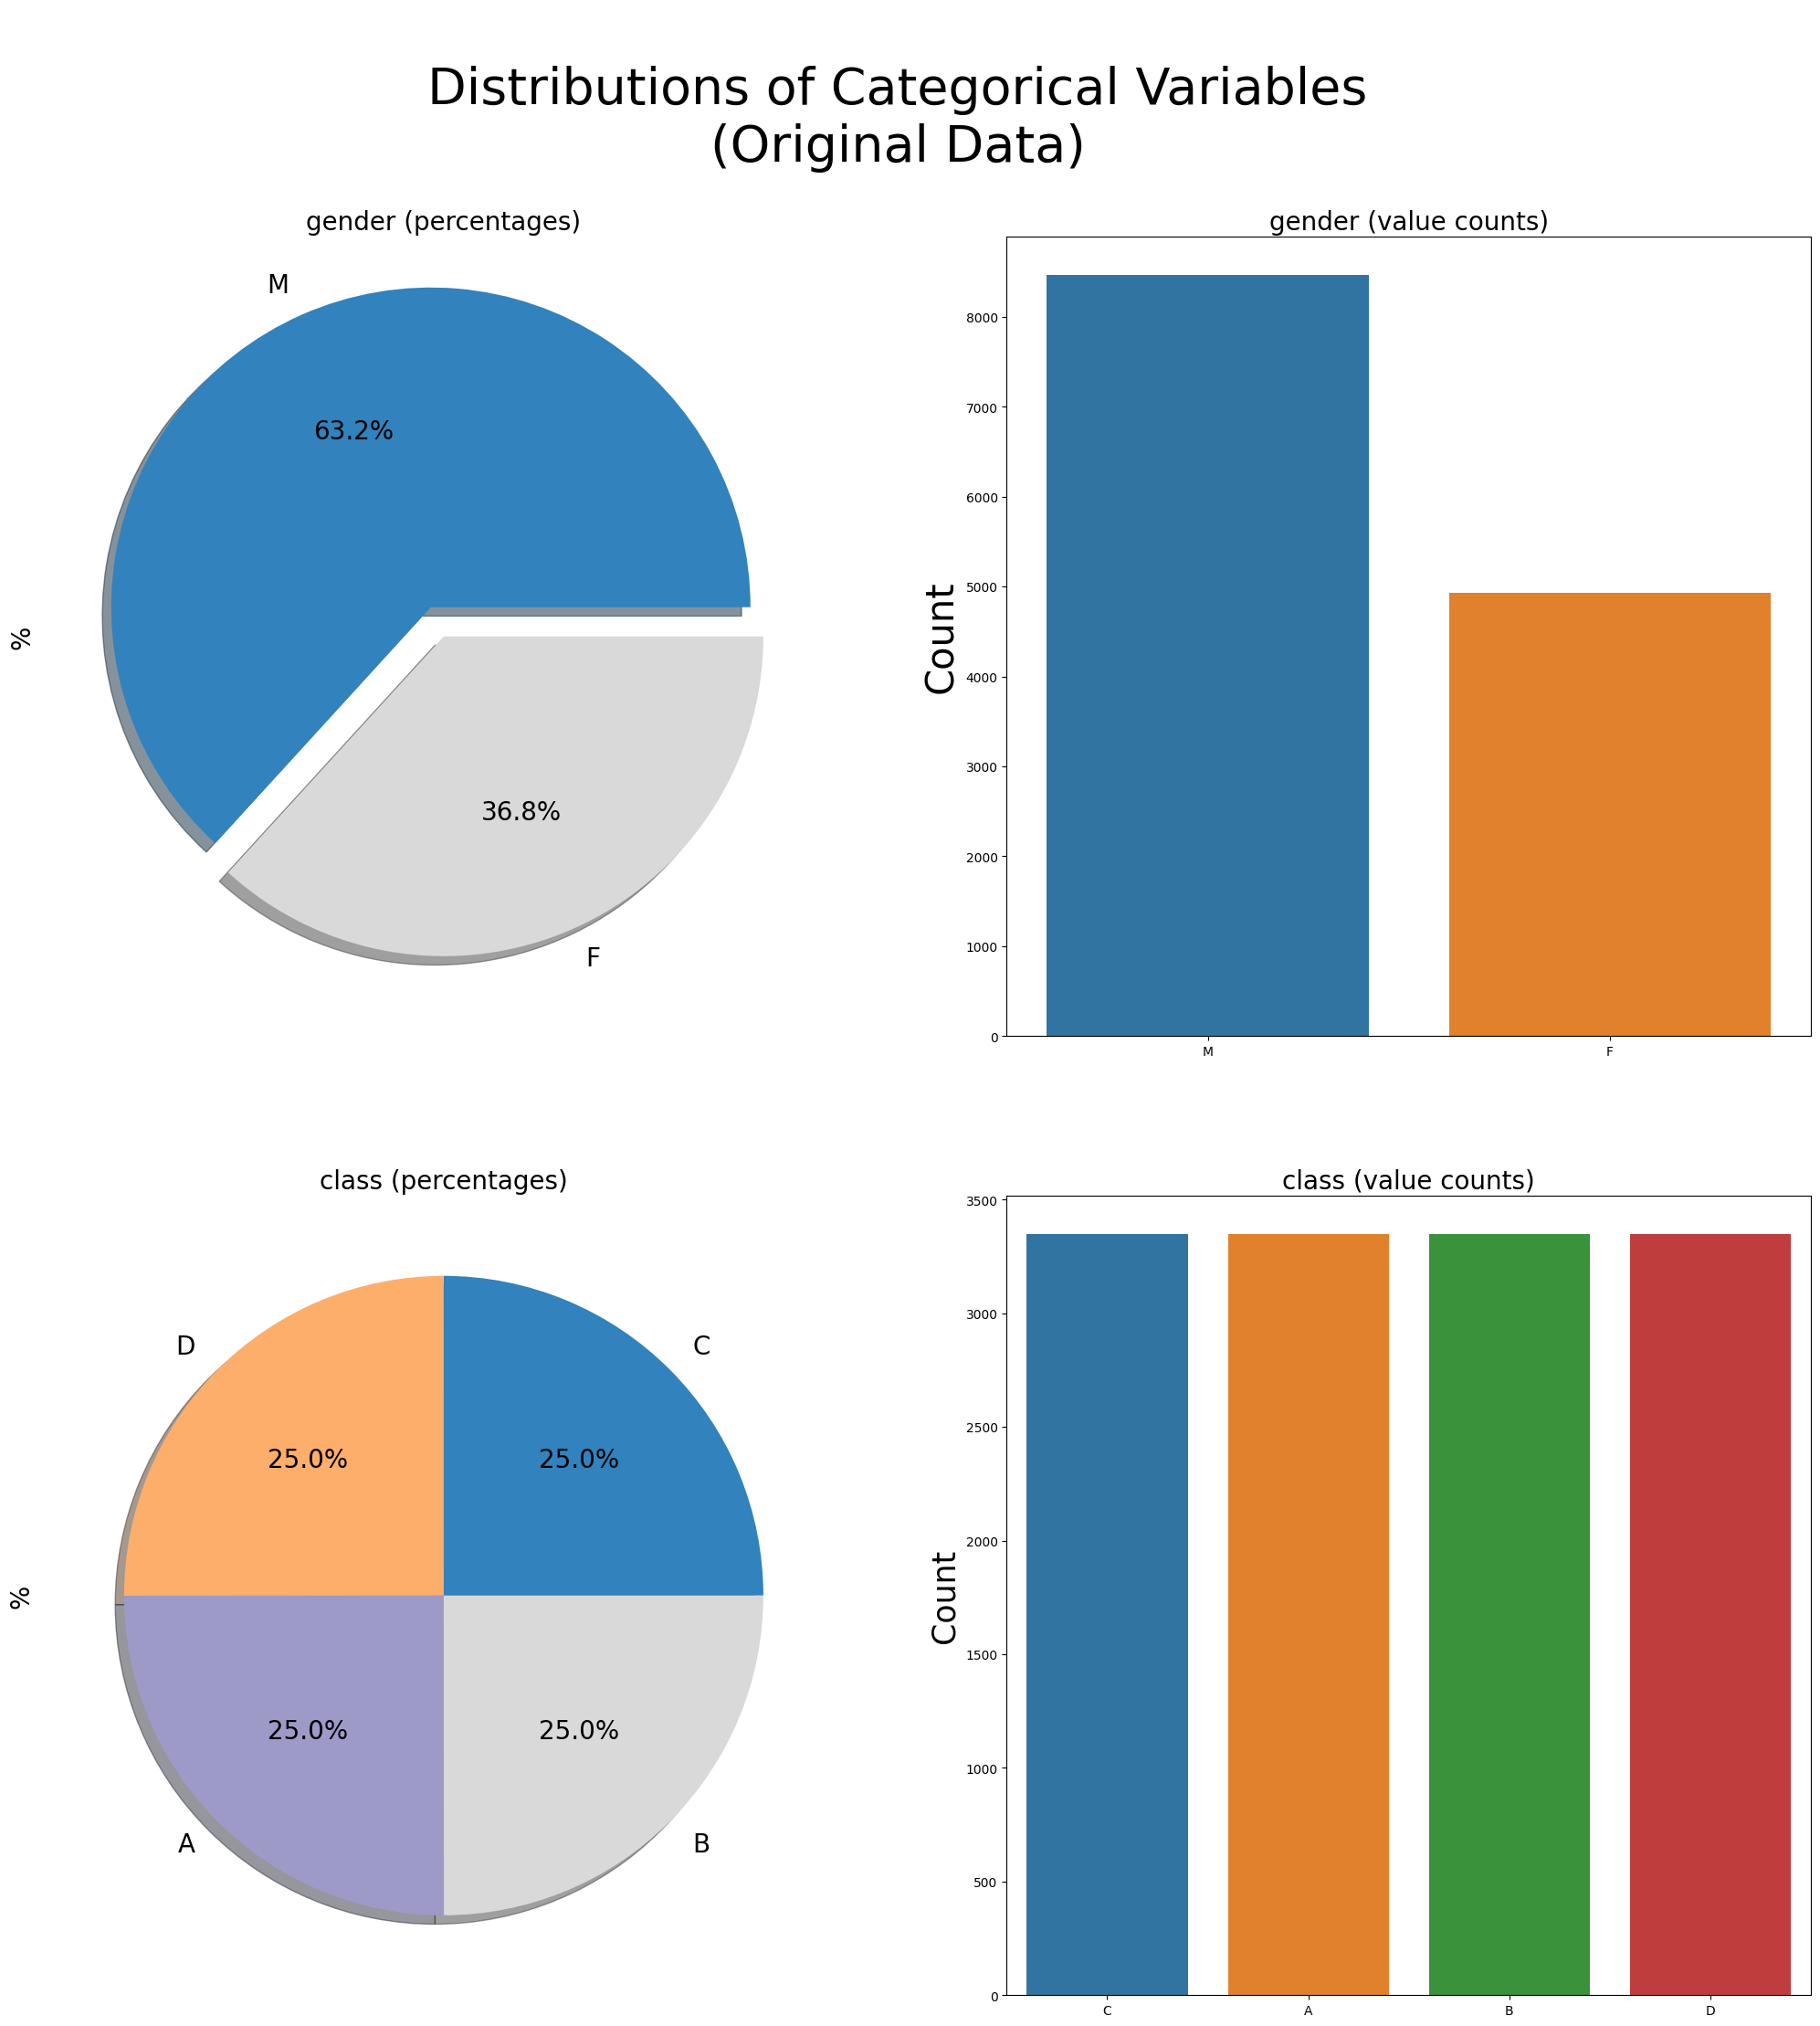

In [32]:
#塞值後觀察各欄位分布 (類別型欄位)

n_rows, n_cols = (2,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 25))
figure.suptitle('\nDistributions of Categorical Variables\n(Original Data)', fontsize=40)
#針對每一個類別型欄位
for i in range(len(categoricals)):
    column=categoricals[i]
    #畫圓餅圖
    graph1=data[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                ax=axes[i,0],
                                                colormap="tab20c",
                                                fontsize=20,
                                                shadow=True,
                                                explode=[0.1,0])
    #設定圓餅圖顯示資訊
    axes[i,0].set_ylabel('%',fontsize=20)
    axes[i,0].set_title(column+' (percentages)', fontsize=20)
    
    #顯示長條圖(bar-chart)
    graph2=sns.countplot(x=column,
                         data=data,
                         ax=axes[i,1])
    #設定長條圖顯示資訊
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=30)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels())
    axes[i,1].set_title(column+' (value counts)', fontsize=20)
    #針對應變數欄位(Chronic Kidney Disease)進行圓餅圖
    graph1=data['class'].value_counts().plot.pie(autopct='%1.1f%%',
                                                                  ax=axes[1,0],
                                                                  colormap='tab20c',
                                                                  fontsize=20,
                                                                  shadow=True
                                                                  )
    axes[1,0].set_ylabel("%",fontsize=20)
    axes[1,0].set_title('class (percentages)',fontsize=20)


    graph2=sns.countplot(x='class',
                         data=data,
                         ax=axes[1,1])
    axes[1,1].set_xlabel(None,fontsize=25)
    axes[1,1].set_ylabel("Count",fontsize=25)
    axes[1,1].set_xticklabels(axes[1,1].get_xticklabels())
    axes[1,1].set_title('class (value counts)', fontsize=20)
plt.show()

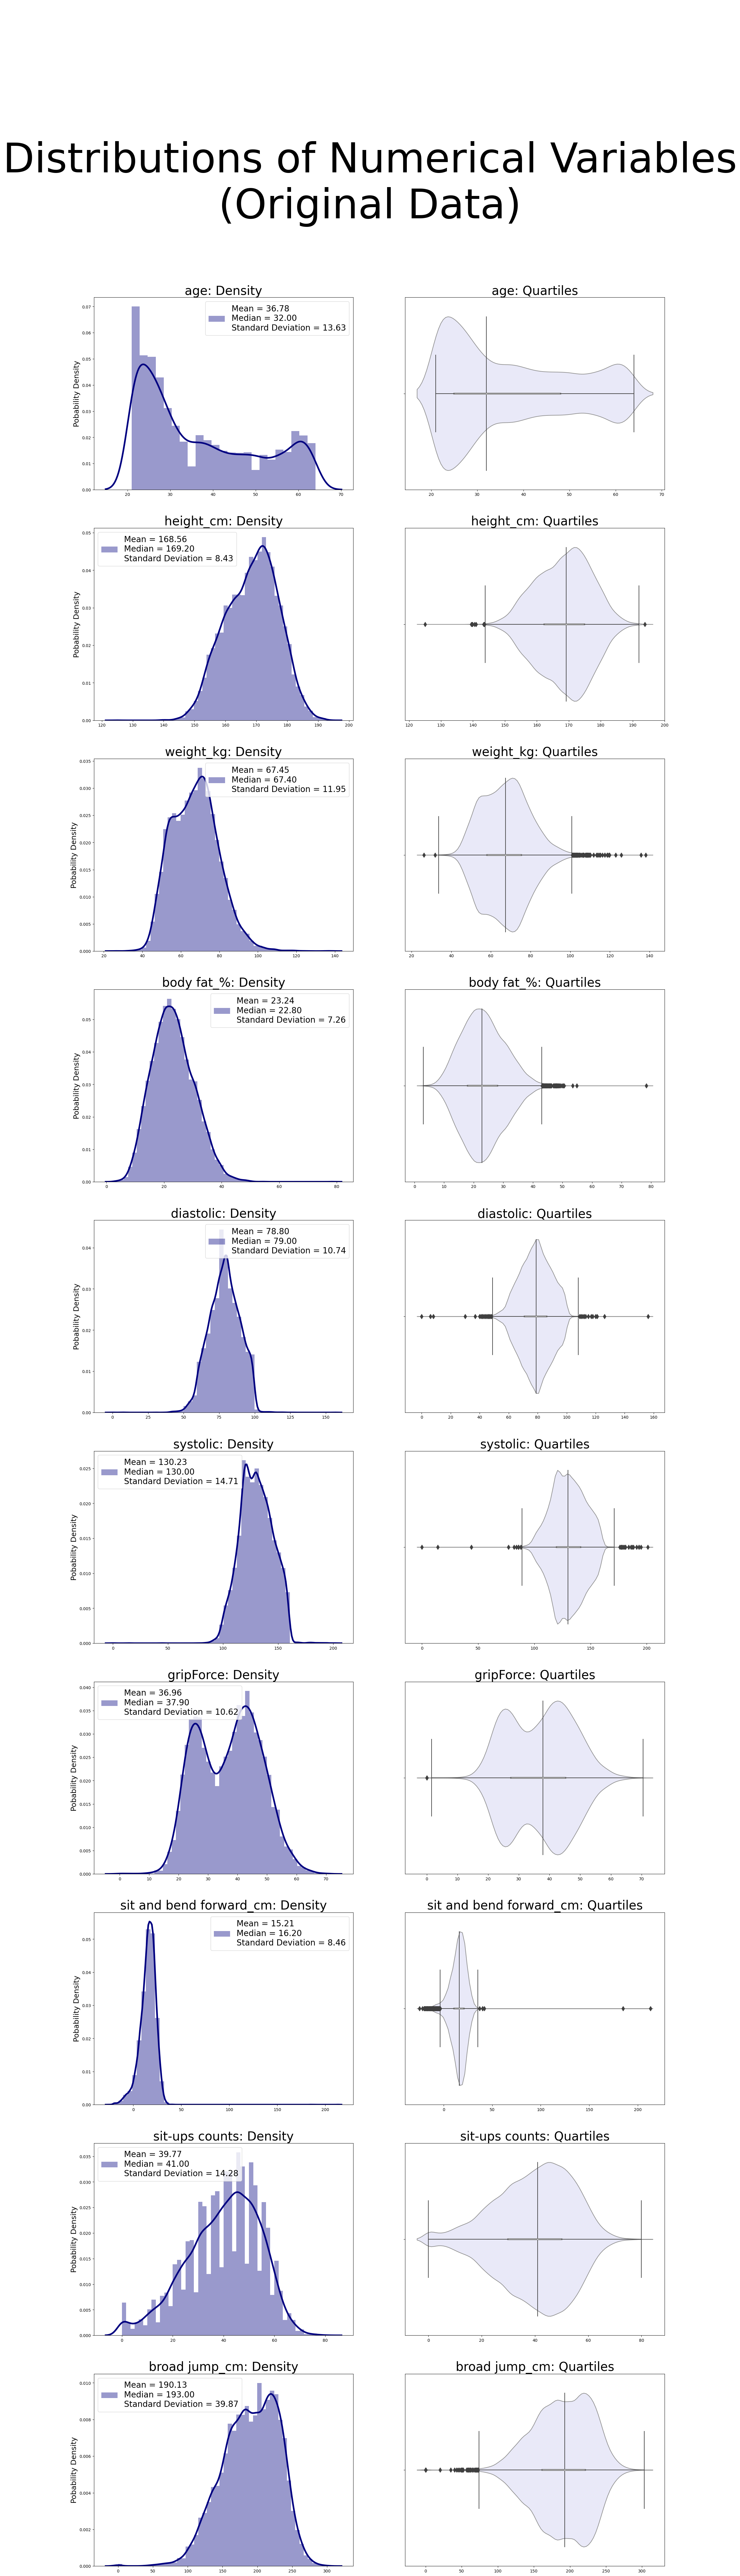

In [33]:
#塞值後觀察各欄位分布 (數值型欄位)

n_rows, n_cols = (10,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 100))
figure.suptitle('\n\n\nDistributions of Numerical Variables\n(Original Data)', fontsize=100)

#走訪每一個欄位
for i in range(len(numeric)):
    
    #處理的欄位
    col=numeric[i]
    
    #每個圖表都要顯示平均值、中位數、標準差
    label='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%data[col].mean(),
                                                                   "%.2f"%data[col].median(),
                                                                   "%.2f"%data[col].std())
    #繪製distplot圖表
    graph1=sns.distplot(data[col],
                        color="navy",
                        ax=axes[i,0],
                        kde_kws={"lw":4},
                        norm_hist=True,
                        label=label).legend(loc='best',fontsize=20)
    axes[i,0].set_title(col+': Density',fontsize=30)
    axes[i,0].set_xlabel(None)
    axes[i,0].set_ylabel("Pobability Density",fontsize=18)

    #繪製小提琴圖
    graph20=sns.violinplot(x=col,
                          data=data,
                          ax=axes[i,1],
                          color='lavender',
                          inner='box')
    #將小提琴圖內的線條補上 (25%, 50% 75% 與 IQR 與 outlier)
    graph21=sns.boxplot(x=col,
                        data=data,
                        ax=axes[i,1],
                        fliersize=8,
                        boxprops=dict(alpha=0))
    
    axes[i,1].set_xlabel(None)
    axes[i,1].set_title(col+': Quartiles',fontsize=30)
    
    
plt.show()

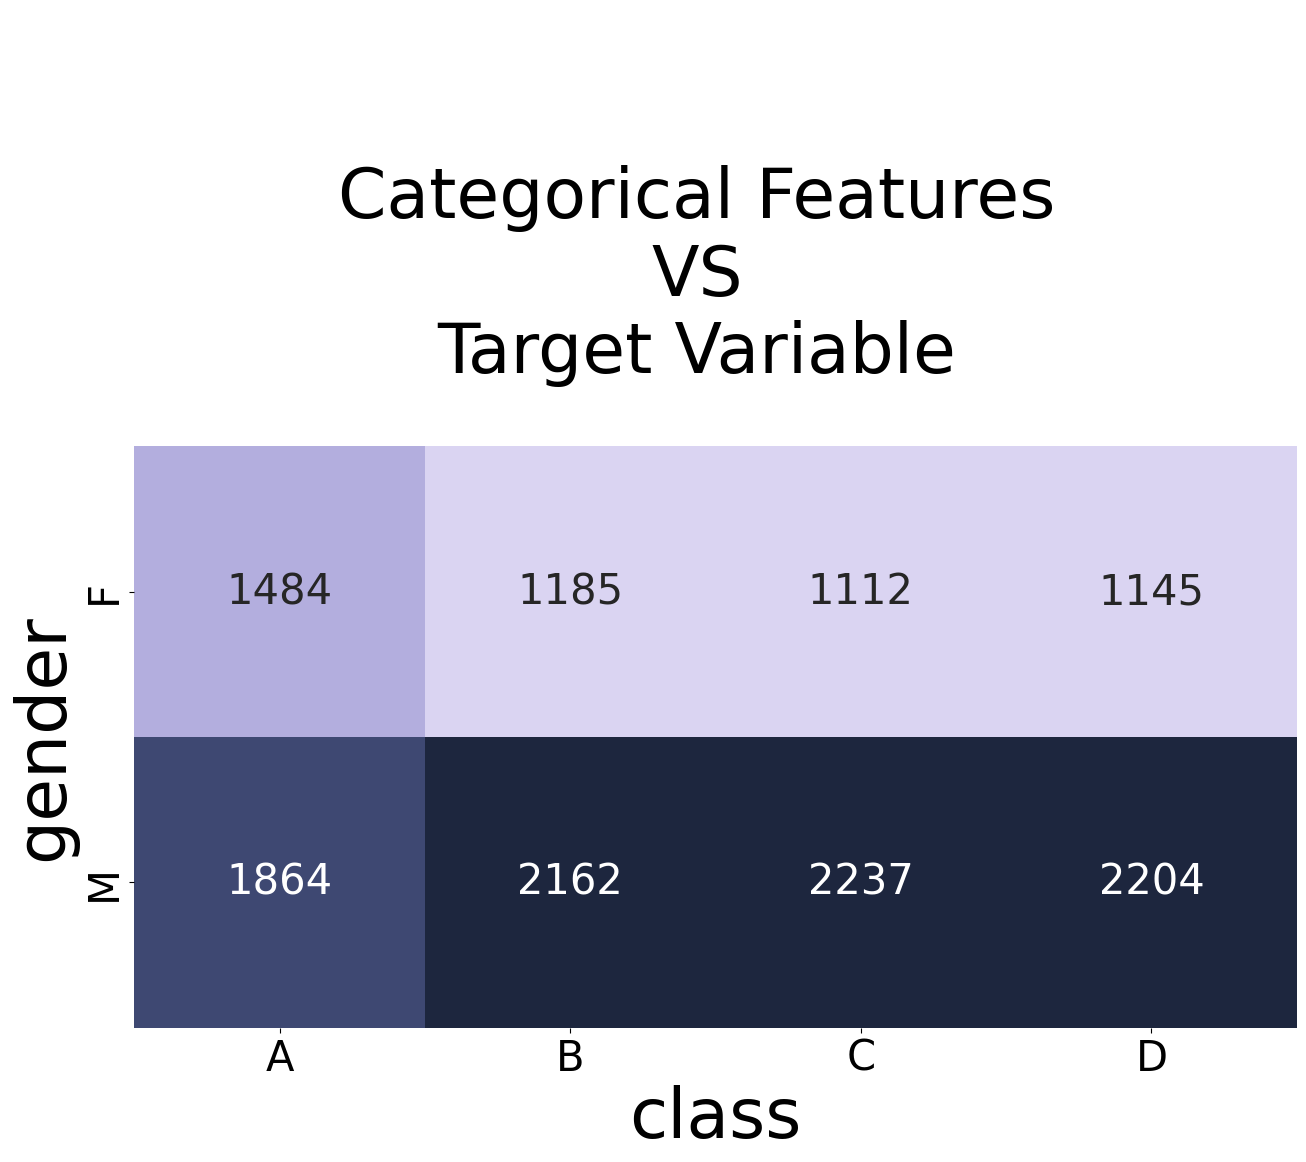

In [34]:
#類別型變數與應變數
n_rows, n_cols = (1,1)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(15, 15))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=50)

#走訪每一個欄位
for index, column in enumerate(categoricals):
    
    #i,j = (index // n_cols), (index % n_cols)
    
    #繪製熱力圖
    fig=sns.heatmap(pd.crosstab(data[column],data['class']),
                #ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':30},
                fmt='d')

    #fig.set_title(fontsize=20)    
    fig.set_xlabel("class", fontsize=50)

    fig.set_ylabel(column,fontsize=50)
    
    fig.set_yticklabels(["F","M"],fontsize=30)
    
    fig.set_xticklabels(["A","B","C","D"],fontsize=30)

plt.show()

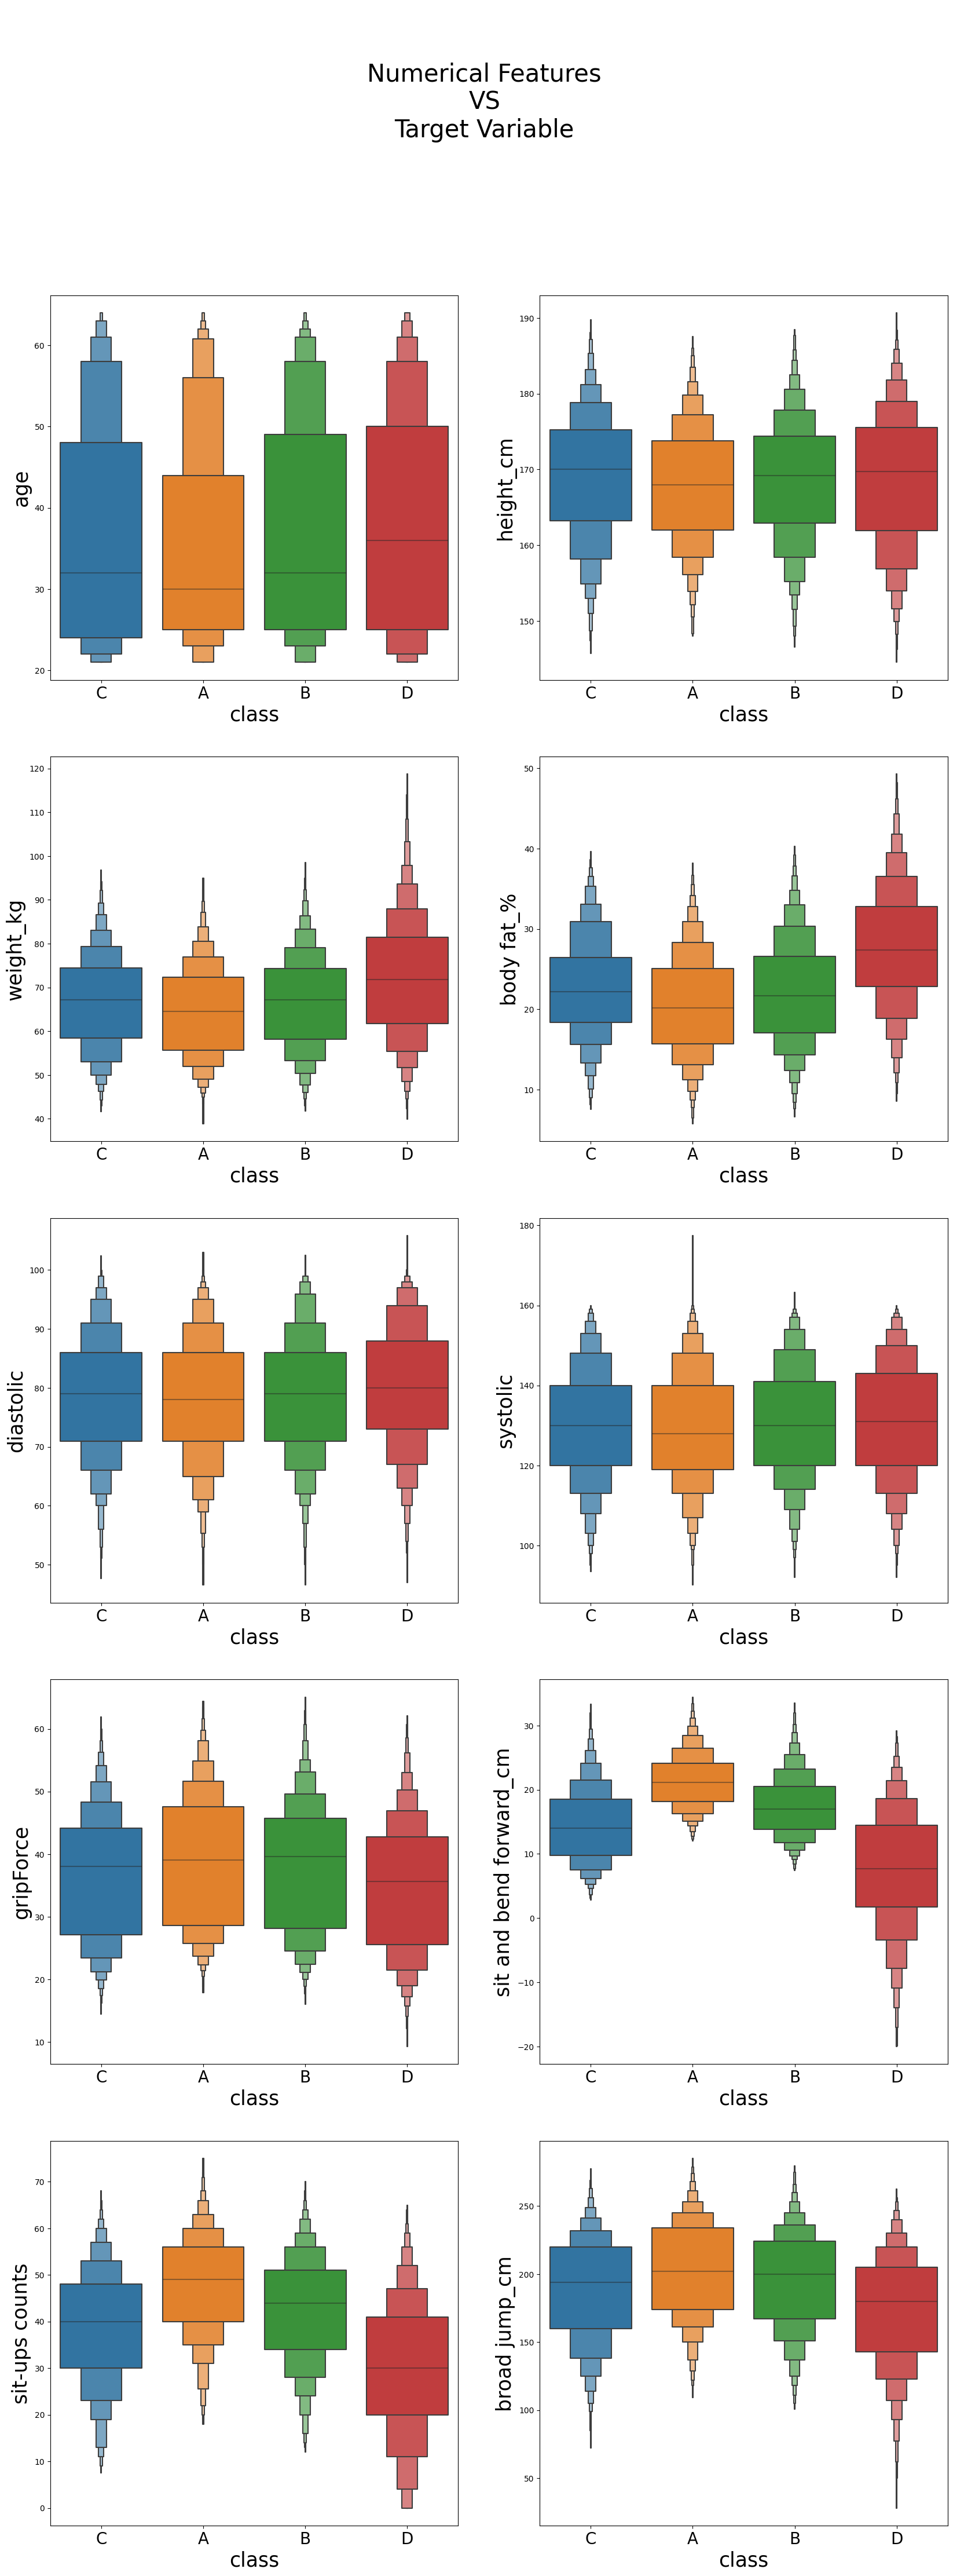

In [35]:
#連續型變數與應變數
n_rows, n_cols = (5,2)

#圖表大小
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nNumerical Features\nVS\nTarget Variable', fontsize=30)

#走訪每一個欄位
for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    #繪製盒鬚圖
    bp=sns.boxenplot(y=column, x='class', data=data, ax=axes[i,j], showfliers=False)
        
    axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=25)

    axes[i,j].set_ylabel(column,fontsize=25)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=20)

plt.show()

進行 Kmeans
目的:針對該人群的體適能數據做分群

In [21]:
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body fat_%               13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit and bend forward_cm  13393 non-null  float64
 8   sit-ups counts           13393 non-null  float64
 9   broad jump_cm            13393 non-null  float64
 10  gender: F                13393 non-null  uint8  
 11  gender: M                13393 non-null  uint8  
 12  class: A                 13393 non-null  uint8  
 13  class: B                 13393 non-null  uint8  
 14  class: C              

In [22]:
#準備資料
X=dummydata.drop(["class: A","class: B","class: C","class: D"],axis=1,inplace=False)
y=dummydata[["class: A","class: B","class: C","class: D"]]
y1=dummydata[["class: A"]]
y2=dummydata[["class: B"]]
y3=dummydata[["class: C"]]
y4=dummydata[["class: D"]]

print("資料筆數:",len(X))
print("欄位數量:",len(X.columns))

資料筆數: 13393
欄位數量: 12


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body fat_%               13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit and bend forward_cm  13393 non-null  float64
 8   sit-ups counts           13393 non-null  float64
 9   broad jump_cm            13393 non-null  float64
 10  gender: F                13393 non-null  uint8  
 11  gender: M                13393 non-null  uint8  
dtypes: float64(10), uint8(2)
memory usage: 1.0 MB


In [24]:
#提供多種scale的方式

#以下四種是最常見的標準化函數
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [25]:
full_scaled_data=SS.fit_transform(X)
scaled_data=SS.fit_transform(full_scaled_data)

In [26]:
from sklearn.cluster import KMeans

轉折點目前發現5可以試試看作為K值


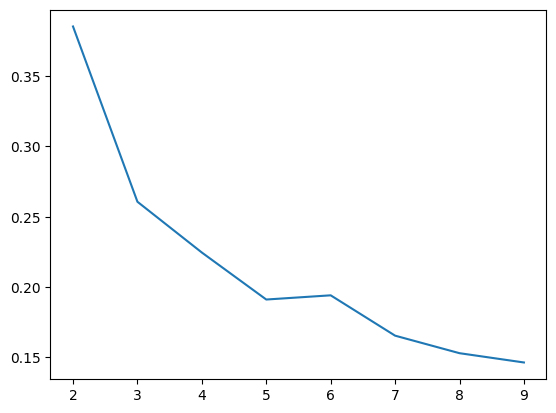

In [27]:
#透過輪廓係數(-1,1) 該值越大表示分群效果越好

from sklearn.metrics import silhouette_score

silhouette_avg = []

#由第2群找到第10群，觀察轉折點 (轉折點就是變化量最大的地方，不是看該值的大小)
for i in range(2,10):
    kmeans_fit = KMeans(n_clusters = i).fit(scaled_data)
    silhouette_avg.append(silhouette_score(scaled_data, kmeans_fit.labels_))
    
plt.plot(range(2,10), silhouette_avg)

print("轉折點目前發現{}可以試試看作為K值".format(5))

In [28]:
#選擇分群數量(K值為5)
n_clusters = 5

#建立Kmeans演算法
kmean = KMeans(n_clusters=n_clusters)

kmean.fit(scaled_data);
print("kmean: k={}".format(n_clusters))

#取得分群結果 (每筆資料都會一個分群代碼，由0開始)
labels = kmean.labels_

#取得分群的中心點(質心)
centers = kmean.cluster_centers_
print(centers)
for i in range(0,5):
    for j in range(0,12):
        print(centers[i][j])

kmean: k=5
[[-0.44504793  0.86603013  0.87893618 -0.4512249   0.74813414  0.79989095
   0.9641135   0.03228086  0.7230343   0.85295105 -0.7620084   0.7620084 ]
 [ 0.99199656  0.21568212  0.44210902  0.1163457   0.53202472  0.54698935
   0.23176959 -0.73556328 -0.47992084 -0.13165317 -0.76111165  0.76111165]
 [-0.58663999 -0.72966414 -0.95669459  0.40331977 -0.48286968 -0.70441787
  -0.9339106   0.64725704 -0.07782838 -0.55710151  1.30760009 -1.30760009]
 [ 1.1223208  -1.31861765 -0.76875128  1.22372067 -0.01448353  0.00997241
  -1.23211102  0.10051185 -1.47845239 -1.50028997  1.29921925 -1.29921925]
 [-0.53261022  0.56696191  0.25158803 -0.83371069 -0.6253878  -0.48563436
   0.60949713 -0.11849277  0.72889925  0.80567484 -0.76275036  0.76275036]]
-0.44504793174090257
0.8660301308596092
0.878936177959204
-0.4512249007418016
0.7481341361013828
0.7998909529647173
0.964113495692601
0.032280857635042993
0.7230343042641177
0.8529510482663029
-0.7620083984047867
0.7620083984047867
0.991996559

In [29]:
#將分群結果寫入dataframe，有利於分群分析
data['group']=labels

In [30]:
#查看個群數量，由第0群開始排序
data['group'].value_counts().sort_index()

0    2797
1    2526
2    3010
3    1929
4    3131
Name: group, dtype: int64

In [31]:
#質心
print(centers.shape)

#將質心存起來，下次Re-fresh的時候還可以用
from numpy import savetxt, loadtxt
savetxt('ckd_kmeans_centers.csv', centers, delimiter=',')

#讀取質心的檔案
load_centers = loadtxt('ckd_kmeans_centers.csv', delimiter=',')

#再次執行kmeans程式
kmean_test_centers = KMeans(n_clusters=n_clusters,init=load_centers)
kmean_test_centers.fit(scaled_data)
labels_test_centers = kmean_test_centers.labels_

#將分群結果寫入dataframe，有利於分群分析
data['group_test_centers']=labels_test_centers

(5, 12)


In [32]:
#欄位group與group_test_centers分群結果一模一樣
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,0
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,4,4
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,0
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,0
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,4,4
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,4,4
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,0
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3,3


In [33]:
#hw(這是第0群)

#請觀查這些變數(透過平均值、中位數...敘述型統計)，給予該群一個名稱定義 (例如: 代謝症候群等等)
#a<-discribe...給質心作解釋
#並且對於該群給予醫療上的建議與衛教方式
#可透過文字或視覺化圖表表示之

#提示: 也可以參考該群內的腎臟病患者比例 (Yes/No)

data[data['group']==0]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,0
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,0
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,0
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B,0,0
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13370,44.0,M,171.3,77.90,22.8,94.0,148.0,42.0,17.9,45.0,205.0,C,0,0
13375,22.0,M,179.8,82.00,12.4,79.0,142.0,50.1,14.2,42.0,201.0,C,0,0
13378,51.0,M,179.8,78.56,21.9,94.0,156.0,47.2,13.9,42.0,196.0,B,0,0
13381,28.0,M,166.5,61.70,22.6,87.0,144.0,38.9,13.9,44.0,208.0,C,0,0


In [48]:
data[data['group']==0].describe(include='all')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
count,2797.000000,2797,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797,2797.0,2797.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN
freq,NaN,2796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765,NaN,NaN
mean,30.729353,NaN,175.859171,77.974122,19.985185,86.832428,142.007508,47.212428,15.475216,50.066500,224.100107,NaN,0.0,0.002860
std,7.659420,NaN,5.350345,9.398530,5.461388,7.086633,9.366654,6.552666,6.575657,8.312168,20.407946,NaN,0.0,0.106943
min,21.000000,NaN,158.300000,50.300000,3.000000,60.000000,107.000000,0.000000,-14.600000,0.000000,126.000000,NaN,0.0,0.000000
25%,25.000000,NaN,172.200000,71.400000,16.100000,82.000000,135.000000,42.800000,11.600000,45.000000,212.000000,NaN,0.0,0.000000
50%,29.000000,NaN,175.700000,77.100000,19.800000,87.000000,142.000000,47.000000,16.000000,50.000000,224.000000,NaN,0.0,0.000000
75%,36.000000,NaN,179.600000,83.600000,23.400000,92.000000,149.000000,51.400000,19.800000,56.000000,237.000000,NaN,0.0,0.000000


In [34]:
#hw(這是第1群)

data[data['group']==1]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
8,54.0,M,166.8,67.5,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C,1,1
25,62.0,M,169.0,70.7,30.5,96.0,146.0,39.3,4.0,43.0,131.0,C,1,1
27,48.0,M,175.8,84.5,31.4,83.0,125.0,33.8,3.7,24.0,211.0,D,1,1
33,30.0,M,172.1,79.5,26.7,91.0,148.0,34.7,-2.0,40.0,192.0,D,1,1
40,42.0,M,168.0,61.0,14.9,94.0,151.0,28.9,1.0,32.0,230.0,D,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13379,59.0,M,169.3,65.2,23.8,75.0,126.0,31.4,6.2,25.0,152.0,D,1,1
13380,42.0,M,172.0,76.3,32.8,100.0,147.0,33.4,-20.0,20.0,100.0,D,1,1
13385,37.0,M,177.5,83.1,29.7,77.0,113.0,41.7,7.2,41.0,167.0,D,1,1
13387,39.0,M,174.4,70.8,24.3,78.0,132.0,41.6,12.0,44.0,168.0,B,1,1


In [49]:
data[data['group']==1].describe(include='all')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
count,2526.000000,2526,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526,2526.0,2526.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
freq,NaN,2524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1102,NaN,NaN
mean,50.314727,NaN,170.369161,72.704105,24.074666,84.511481,138.281473,39.412660,8.984109,32.910926,184.834917,NaN,1.0,1.0
std,11.639958,NaN,5.388127,9.846736,5.498355,8.932423,13.000516,5.947207,8.483441,8.939598,22.940648,NaN,0.0,0.0
min,21.000000,NaN,153.400000,39.900000,3.500000,42.000000,91.000000,3.500000,-25.000000,0.000000,0.000000,NaN,1.0,1.0
25%,43.000000,NaN,166.800000,66.200000,20.400000,79.000000,129.000000,35.500000,4.200000,27.000000,172.000000,NaN,1.0,1.0
50%,53.500000,NaN,170.400000,71.830000,23.700000,85.000000,139.000000,39.600000,10.200000,33.000000,186.000000,NaN,1.0,1.0
75%,60.000000,NaN,173.800000,77.900000,27.500000,91.000000,148.000000,43.200000,15.075000,39.000000,200.000000,NaN,1.0,1.0


In [35]:
#hw(這是第2群)

data[data['group']==2]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B,2,2
12,27.0,F,156.0,53.90,35.5,69.0,116.0,23.1,13.1,28.0,144.0,C,2,2
16,25.0,F,164.2,66.60,30.2,82.0,120.0,25.7,22.9,39.0,178.0,C,2,2
19,21.0,F,162.7,47.20,18.9,78.0,133.0,25.4,20.5,36.0,137.0,B,2,2
20,25.0,F,161.7,63.36,31.3,89.0,128.0,25.0,10.7,39.0,160.0,C,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13354,51.0,F,166.0,47.00,20.1,70.0,130.0,22.5,27.2,26.0,162.0,A,2,2
13358,35.0,F,161.4,52.60,23.4,72.0,101.0,31.1,21.0,42.0,183.0,A,2,2
13362,35.0,F,158.2,54.00,29.2,78.0,111.0,27.6,26.7,28.0,168.0,B,2,2
13367,28.0,F,157.3,67.44,27.8,61.0,125.0,32.2,27.4,43.0,157.0,A,2,2


In [50]:
data[data['group']==2].describe(include='all')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
count,3010.000000,3010,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010,3010.0,3010.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN
freq,NaN,3005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1242,NaN,NaN
mean,28.782060,NaN,162.411462,56.015561,26.166884,73.610033,119.870432,27.041575,20.682708,38.660133,167.919934,NaN,2.0,2.0
std,8.124755,NaN,5.034308,6.828537,5.231078,10.200305,12.262601,4.579036,7.821355,9.867607,20.242840,NaN,0.0,0.0
min,21.000000,NaN,145.400000,31.900000,9.400000,0.000000,0.000000,0.000000,-18.900000,5.000000,0.000000,NaN,2.0,2.0
25%,23.000000,NaN,158.925000,51.500000,22.400000,67.000000,111.000000,24.000000,17.400000,32.000000,156.000000,NaN,2.0,2.0
50%,26.000000,NaN,162.300000,55.300000,26.100000,73.000000,119.000000,26.900000,21.100000,39.000000,168.000000,NaN,2.0,2.0
75%,32.000000,NaN,165.900000,60.100000,29.900000,80.000000,128.000000,29.900000,24.600000,45.000000,181.000000,NaN,2.0,2.0


In [36]:
#hw(這是第2群)

data[data['group']==3]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
6,42.0,F,164.5,63.7,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D,3,3
11,57.0,F,153.0,49.0,20.9,69.0,106.0,21.5,30.0,0.0,90.0,D,3,3
15,45.0,F,159.0,63.1,30.9,93.0,144.0,34.1,19.0,30.0,155.0,A,3,3
21,59.0,F,155.9,62.7,30.2,76.0,143.0,36.8,29.1,25.0,122.0,A,3,3
26,47.0,F,158.3,53.5,29.2,70.0,117.0,25.9,8.1,32.0,151.0,D,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13366,53.0,F,155.1,60.0,31.2,78.0,125.0,28.2,17.6,19.0,139.0,B,3,3
13374,40.0,F,160.5,68.8,35.1,66.0,109.0,20.5,2.0,16.0,119.0,D,3,3
13384,64.0,F,152.4,55.9,33.1,87.0,158.0,23.5,20.0,14.0,154.0,B,3,3
13386,62.0,F,156.2,40.0,20.2,61.0,115.0,18.5,5.7,1.0,81.0,D,3,3


In [51]:
data[data['group']==3].describe(include='all')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
count,1929.000000,1929,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929,1929.0,1929.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
freq,NaN,1918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,829,NaN,NaN
mean,52.066874,NaN,157.448782,58.261337,32.120184,78.641265,130.381545,23.873354,16.059233,18.664593,130.318300,NaN,3.0,3.0
std,9.935904,NaN,5.199186,8.506327,5.944126,10.564997,15.372471,4.184931,7.567946,10.002477,24.064214,NaN,0.0,0.0
min,21.000000,NaN,125.000000,26.300000,3.500000,40.000000,90.000000,1.600000,-22.000000,0.000000,0.000000,NaN,3.0,3.0
25%,47.000000,NaN,154.000000,52.600000,28.200000,71.000000,119.000000,21.200000,12.500000,12.000000,118.000000,NaN,3.0,3.0
50%,55.000000,NaN,157.300000,57.200000,32.300000,79.000000,130.000000,23.900000,17.400000,19.000000,133.000000,NaN,3.0,3.0
75%,60.000000,NaN,161.000000,62.400000,35.900000,86.000000,142.000000,26.600000,21.200000,25.000000,147.000000,NaN,3.0,3.0


In [52]:
data[data['group']==4]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,4,4
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,4,4
10,42.0,M,169.2,65.40,19.3,63.0,110.0,43.5,16.0,68.0,211.0,A,4,4
13,22.0,M,175.7,67.90,11.3,71.0,103.0,52.5,19.2,55.0,232.0,C,4,4
14,24.0,M,181.0,84.40,20.4,80.0,120.0,48.9,7.2,54.0,213.0,C,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,29.0,M,173.1,76.80,21.3,72.0,129.0,48.2,13.7,44.0,192.0,C,4,4
13382,21.0,M,177.5,74.20,13.7,64.0,133.0,46.2,11.4,64.0,233.0,B,4,4
13383,25.0,M,170.7,68.86,13.3,60.0,106.0,39.2,14.1,51.0,235.0,B,4,4
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,4,4


In [53]:
data[data['group']==4].describe(include='all')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,group,group_test_centers
count,3131.000000,3131,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131.000000,3131,3131.0,3131.0
unique,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN
freq,NaN,3131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,903,NaN,NaN
mean,29.515490,NaN,173.335580,70.451852,17.190100,72.090259,123.099617,43.436867,14.208393,50.180773,222.255541,NaN,4.0,4.0
std,8.336647,NaN,5.319538,7.510321,4.768237,7.795597,9.546301,6.653569,7.322522,8.592286,22.092618,NaN,0.0,0.0
min,21.000000,NaN,148.000000,36.500000,3.000000,6.000000,14.000000,0.000000,-20.000000,18.000000,83.000000,NaN,4.0,4.0
25%,23.000000,NaN,169.700000,65.400000,13.800000,67.000000,118.000000,39.000000,10.300000,45.000000,209.000000,NaN,4.0,4.0
50%,27.000000,NaN,173.100000,70.300000,17.098190,73.000000,123.000000,43.400000,15.200000,50.000000,224.000000,NaN,4.0,4.0
75%,33.000000,NaN,176.900000,75.200000,20.400000,78.000000,129.000000,47.700000,18.800000,56.000000,237.000000,NaN,4.0,4.0


<AxesSubplot: xlabel='body fat_%', ylabel='class'>

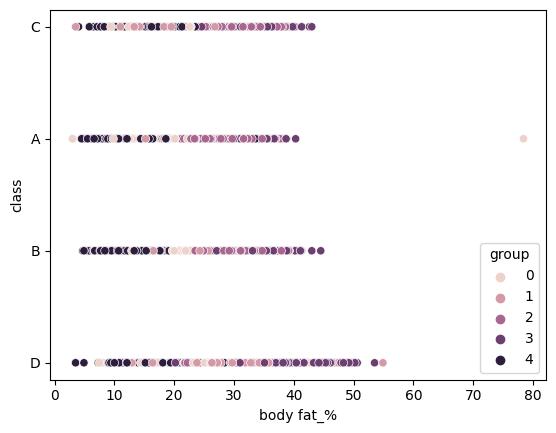

In [38]:
sns.scatterplot(x="body fat_%", y="class", hue= 'group',  data=data, )

<AxesSubplot: xlabel='age', ylabel='class'>

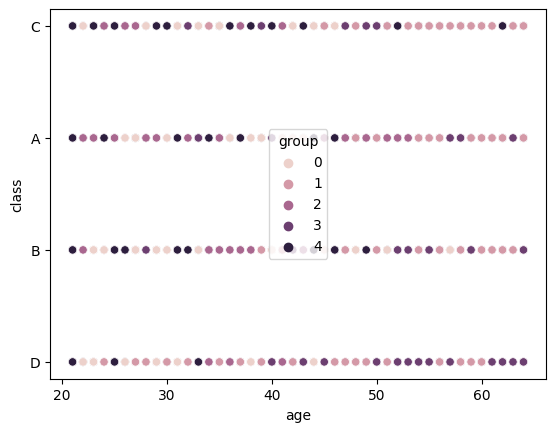

In [39]:
sns.scatterplot(x="age", y="class", hue= 'group',  data=data, )

<AxesSubplot: xlabel='gender', ylabel='class'>

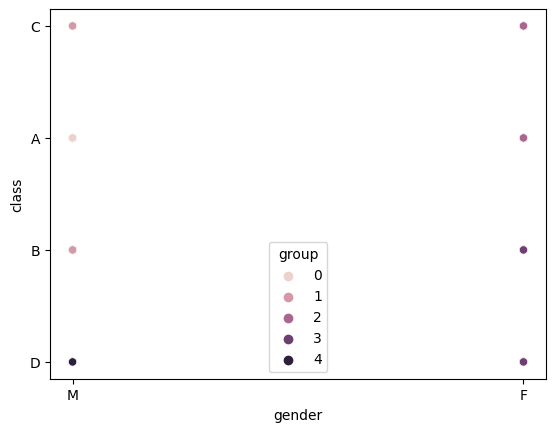

In [40]:
sns.scatterplot(x="gender", y="class", hue= 'group',  data=data, )

<AxesSubplot: xlabel='sit and bend forward_cm', ylabel='class'>

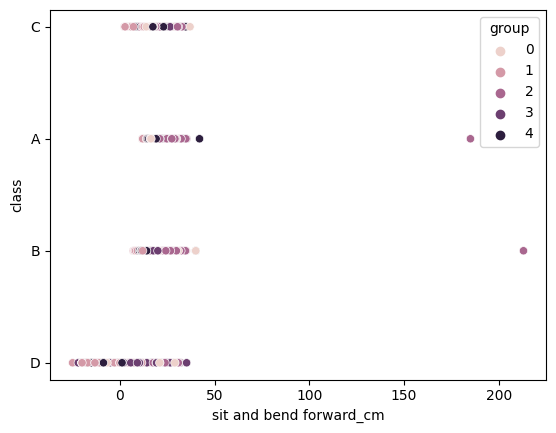

In [41]:
sns.scatterplot(x="sit and bend forward_cm", y="class", hue= 'group',  data=data, )

<AxesSubplot: xlabel='sit and bend forward_cm', ylabel='body fat_%'>

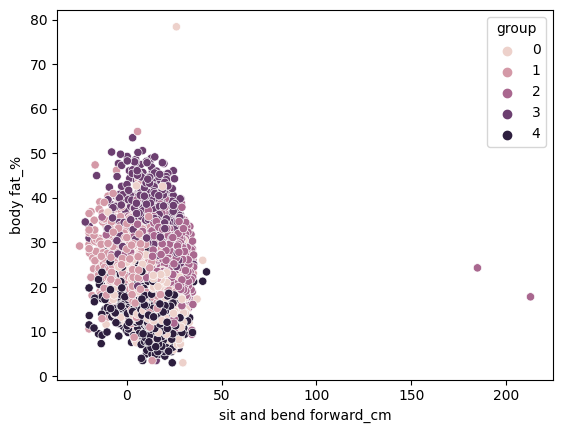

In [42]:
sns.scatterplot(x="sit and bend forward_cm", y="body fat_%", hue= 'group',  data=data, )

<AxesSubplot: xlabel='body fat_%', ylabel='systolic'>

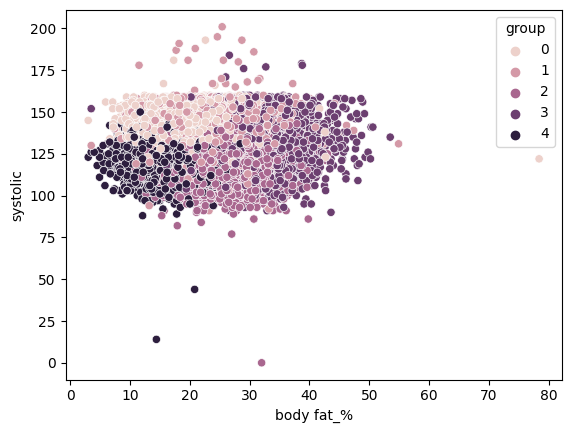

In [43]:
sns.scatterplot(x="body fat_%", y="systolic", hue= 'group',  data=data, )

<AxesSubplot: xlabel='diastolic', ylabel='body fat_%'>

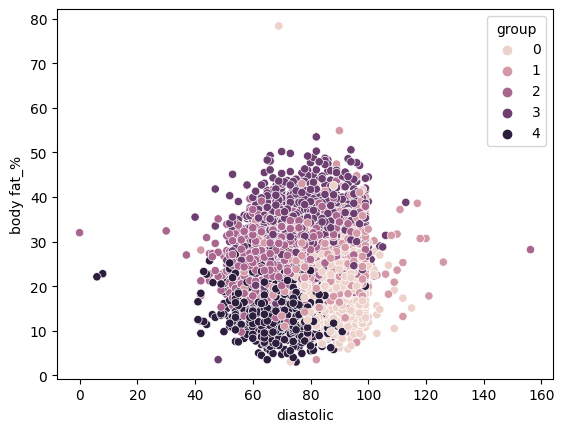

In [44]:
sns.scatterplot(x="diastolic", y="body fat_%", hue= 'group',  data=data, )

<AxesSubplot: xlabel='broad jump_cm', ylabel='body fat_%'>

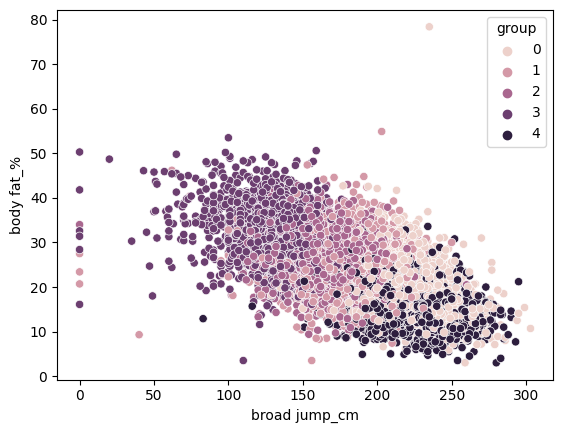

In [45]:
sns.scatterplot(x="broad jump_cm", y="body fat_%", hue= 'group',  data=data, )